In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.max_columns", None)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
plt.style.use('dark_background')

In [3]:
import cogsworth
p = cogsworth.pop.Population(2000, processes=6)
p

<Population - 2000 systems - galactic_potential=MilkyWayPotential, SFH=Frankel2018>


Though this class is initialised, we still need to actually create the population to find its present day state. We do this by running:

In [4]:
p.create_population()

Run for 2000 binaries
Ended up with 2649 binaries with m1 > 0 solar masses
[3e-02s] Sample initial binaries
[1.7s] Evolve binaries (run COSMIC)


100%|██████████| 2649/2649 [00:15<00:00, 168.01it/s]


[21.4s] Get orbits (run gala)
Overall: 23.1s


In [5]:
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.356411,0.111549,0.0,0.0,12.595430,7.573341,0.017420,0.057903,0.042214,1.0,0.000000,0.000000,2.923825e+05,3.027120e+06,0.0,0.0,0.345150,0.148483,0.356411,0.111549,0.017246,0.001362,3576.308037,2890.661657,0.0,0.0,0.351036,0.055774,0.337797,0.096514,0.546320,0.000142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,6727.784886,0.356411,0.111549,0.0,0.0,12.595326,7.573247,0.017420,0.058132,0.042230,10.0,6727.784886,6727.784886,2.923825e+05,3.027120e+06,0.0,0.0,0.346508,0.148540,0.356411,0.111549,0.017380,0.001363,3576.216161,2890.645925,0.0,0.0,0.351036,0.055774,0.339126,0.096551,0.542046,0.000142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.267290,0.096037,0.0,0.0,2275.800125,20874.921669,0.623218,0.000677,0.000569,1.0,0.000000,0.000000,3.910640e+05,3.050296e+06,0.0,0.0,0.272620,0.143754,0.267290,0.096037,0.012842,0.000969,3738.075644,2697.710409,0.0,0.0,0.133645,0.048018,0.177203,0.093440,0.072676,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,11946.481856,0.267290,0.096037,0.0,0.0,2275.800125,20874.921669,0.623218,0.000682,0.000569,10.0,11946.481856,11946.481856,3.910640e+05,3.050296e+06,0.0,0.0,0.274528,0.143754,0.267290,0.096037,0.013062,0.000971,3740.890312,2699.165238,0.0,0.0,0.133645,0.048018,0.178443,0.093440,0.071670,0.000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.381845,0.188826,0.0,0.0,19.869502,13.588137,0.342132,0.061748,0.051297,1.0,0.000000,0.000000,2.109021e+05,9.083150e+05,0.0,0.0,0.355940,0.214499,0.381845,0.188826,0.022808,0.006136,3776.610070,3503.670917,0.0,0.0,0.297027,0.094413,0.257796,0.139425,0.908802,0.006079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,7175.191203,0.188269,0.081268,0.0,0.0,9.778985,6.826585,0.660427,0.146002,0.144103,10.0,7175.191203,7175.191203,1.013448e+06,5.438560e+06,0.0,0.0,0.219671,0.147884,0.188269,0.081268,0.005151,0.000470,3314.027521,2220.182759,0.0,0.0,0.094135,0.040634,0.142786,0.096125,0.005792,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2646
2647,0.000000,0.445018,0.385859,0.0,0.0,4.982461,1.414066,0.304407,0.300603,0.283444,1.0,0.000000,0.000000,1.572695e+05,2.205508e+05,0.0,0.0,0.407693,0.360168,0.445018,0.385859,0.031080,0.022461,3812.608978,3740.029724,0.0,0.0,0.202000,0.289466,0.189327,0.250522,2.630961,0.974778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2647
2647,83.745368,0.445018,0.385859,0.0,0.0,4.982171,1.413943,0.304387,0.300646,0.283476,10.0,83.745368,83.745368,1.572695e+05,2.205508e+05,0.0,0.0,0.407741,0.360199,0.445018,0.385859,0.031086,0.022464,3812.573473,3740.004826,0.0,0.0,0.202000,0.289466,0.189349,0.250543,2.630345,0.974615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2647
2648,0.000000,0.411529,0.197363,0.0,0.0,7691.121626,100181.240819,0.708125,0.000381,0.000312,1.0,0.000000,0.000000,1.803680e+05,8.450763e+05,0.0,0.0,0.379103,0.222142,0.411529,0.197363,0.026637,0.006630,3804.185192,3510.210499,0.0,0.0,0.246448,0.197363,0.212466,0.222142,1.533448,0.008298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2648


There are of course **many** things that you can do with this table! But let's say, maybe you want get any binaries that experiences mass transfer

In [6]:
mt_bin_nums = p.bpp[p.bpp["evol_type"] == 3.0]["bin_num"].unique()

Let's take a look at the evolution of the first binary in this list

In [7]:
p.bpp[p.bpp["bin_num"] == mt_bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
3,0.000000,1.172938,0.896524,1.0,1.0,7.208066,1.559092,0.28465,0.534786,0.440444,1.0,0.000000,0.000000,4.989490e+03,13308.478059,0.000000,0.0,1.109587,0.808279,1.172938,0.896524,2.068749,0.585738,6601.093060,5641.761498,0.000000,0.0,1.179498e-02,0.044277,2.157764e-01,0.232640,1677.657166,314.519375,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3
3,4989.490083,1.172938,0.896524,2.0,1.0,6.274802,1.266320,0.00000,0.871989,0.397411,2.0,4989.490083,4989.490083,4.989490e+03,13308.478059,0.137651,0.0,2.201685,0.887510,1.172938,0.896524,5.556539,0.787137,5999.196336,5796.897999,0.122977,0.0,1.261228e-01,0.046086,9.492871e-01,0.259169,2030.487704,1811.326007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,3
3,5176.767987,1.172555,0.896577,3.0,1.0,6.264376,1.263266,0.00000,0.951645,0.399677,2.0,5182.417226,5175.602865,4.995036e+03,13305.427918,0.169219,0.0,2.398614,0.891169,1.172555,0.896577,4.892126,0.798097,5567.546372,5805.016803,0.113964,0.0,5.016690e-01,0.046325,1.485024e+00,0.260817,1355.465001,1816.584351,0.0,0.0,0.0,0.0,0.0,0.0,-5.649239,1.165123,0.0,0.0,3
3,5196.036422,1.172515,0.896583,3.0,1.0,6.136666,1.224843,0.00000,1.000000,0.408165,3.0,5201.685661,5194.736796,4.995036e+03,13305.082790,0.170898,0.0,2.469086,0.891550,1.172555,0.896583,5.190802,0.799244,5569.421953,5805.859883,0.113543,0.0,5.309179e-01,0.046351,1.580670e+00,0.260992,1873.603802,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,-5.649239,1.299626,0.0,0.0,3
3,5196.036422,1.172515,0.896583,3.0,1.0,6.136666,1.224843,0.00000,1.000000,0.408165,7.0,5201.685661,5194.736796,4.995036e+03,13305.082790,0.170898,0.0,2.469086,0.891550,1.172555,0.896583,5.190802,0.799244,5569.421953,5805.859883,0.113543,0.0,5.309179e-01,0.046351,1.580670e+00,0.260992,1873.603802,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,-5.649239,1.299626,0.0,0.0,3
3,5196.036422,1.987355,0.896583,3.0,15.0,0.000000,0.000000,0.00000,1.000000,0.408165,8.0,5201.685661,5194.736796,4.995036e+03,13305.082790,0.173919,0.0,2.469086,0.891550,1.172555,0.896583,5.190802,0.799244,5569.421953,5805.859883,0.113543,0.0,5.309179e-01,0.046351,1.580670e+00,0.260992,1873.603802,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,-5.649239,1.299626,0.0,0.0,3
3,5574.506746,1.938916,0.000000,4.0,15.0,0.000000,0.000000,-1.00000,0.000100,-1.000000,2.0,1130.802348,5194.736796,1.099425e+03,13305.082790,0.332131,0.0,19.946403,0.891550,1.938916,0.896583,276.233897,0.799244,5292.447563,5805.859883,0.061038,0.0,1.606784e+00,0.046351,1.988536e+01,0.260992,45.503291,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,4443.704398,1.299626,0.0,0.0,3
3,5856.974380,1.921011,0.000000,5.0,15.0,0.000000,0.000000,-1.00000,0.000100,-1.000000,2.0,1413.269982,5194.736796,1.099425e+03,13305.082790,0.554696,0.0,13.500650,0.891550,1.938916,0.896583,145.052097,0.799244,5476.124088,5805.859883,0.123384,0.0,1.366315e+00,0.046351,1.337727e+01,0.260992,107.618204,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,4443.704398,1.299626,0.0,0.0,3
3,5861.883307,1.901220,0.000000,6.0,15.0,0.000000,0.000000,-1.00000,0.000100,-1.000000,2.0,1418.178909,5194.736796,1.099425e+03,13305.082790,0.554696,0.0,131.236876,0.891550,1.938916,0.896583,5120.183057,0.799244,4281.175596,5805.859883,0.067043,0.0,1.346525e+00,0.046351,1.311698e+02,0.260992,1.048523,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,4443.704398,1.299626,0.0,0.0,3
3,5864.317995,0.751112,0.000000,11.0,15.0,0.000000,0.000000,-1.00000,0.000100,-1.000000,2.0,0.000000,5194.736796,1.099425e+03,13305.082790,0.751112,0.0,0.010881,0.891550,0.751112,0.896583,16.547836,0.799244,112102.783060,5805.859883,0.010881,0.0,1.000000e-10,0.046351,1.000000e-10,0.260992,0.000005,1873.603802,0.0,0.0,0.0,0.0,0.0,0.0,5864.317995,1.299626,0.0,0.0,3


We can also put this to use. Let's see how the initial orbital periods are different for binaries that experience mass transfer.

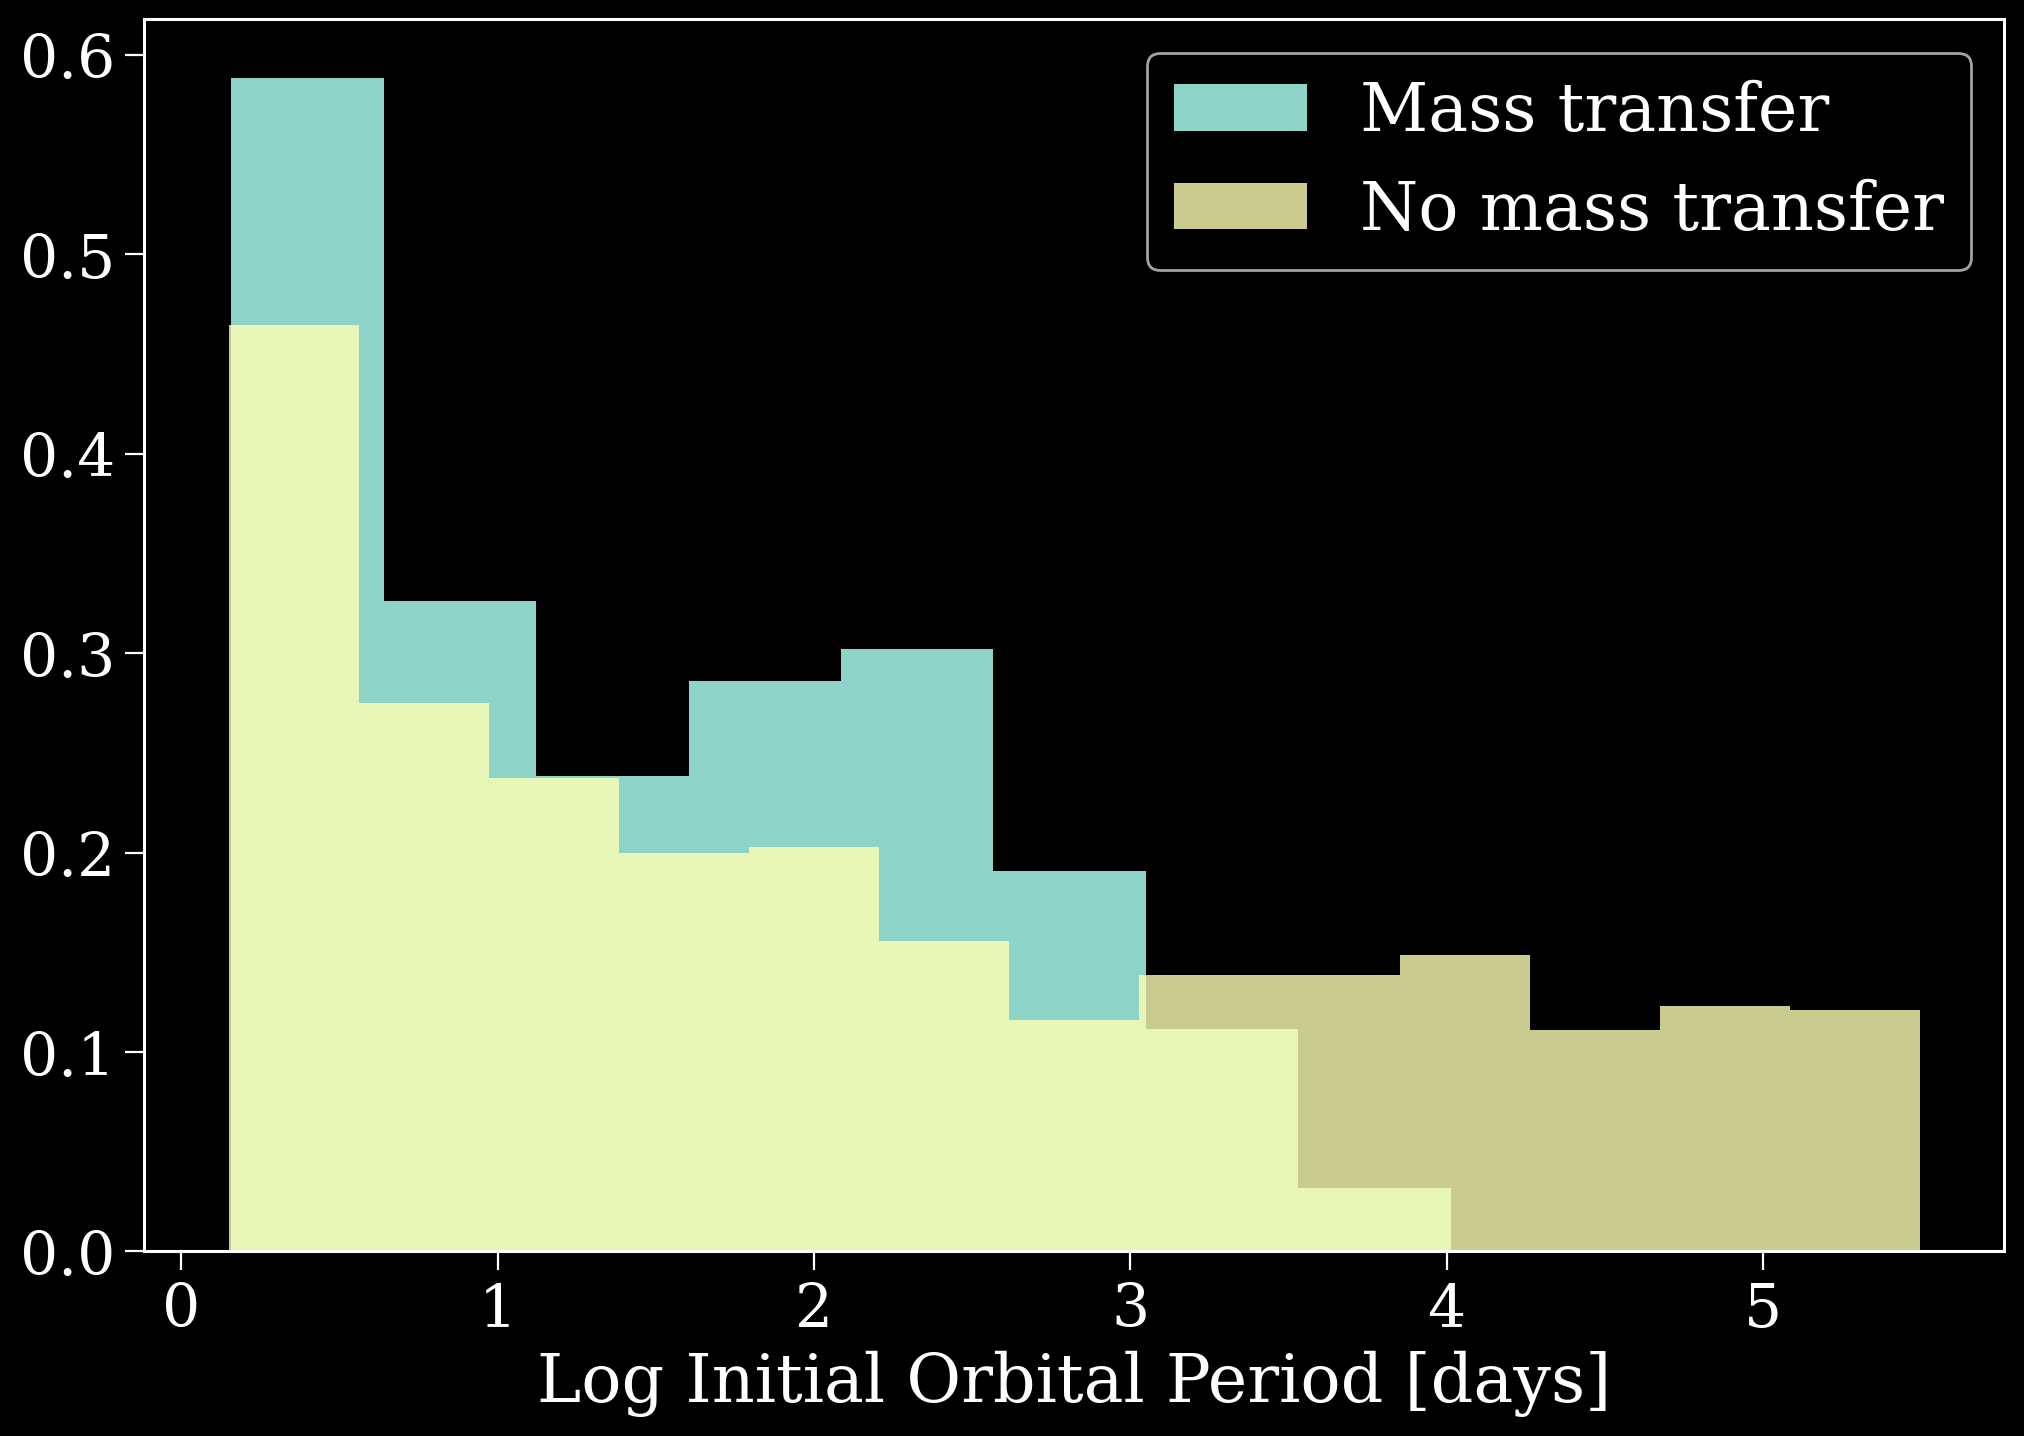

In [8]:
experienced_mt = p.initC["bin_num"].isin(mt_bin_nums)
plt.hist(np.log10(p.initC["porb"][experienced_mt]), bins="fd", density=True, label="Mass transfer")
plt.hist(np.log10(p.initC["porb"][~experienced_mt]), bins="fd", density=True, label="No mass transfer", alpha=0.8)
plt.legend()
plt.xlabel("Log Initial Orbital Period [days]");

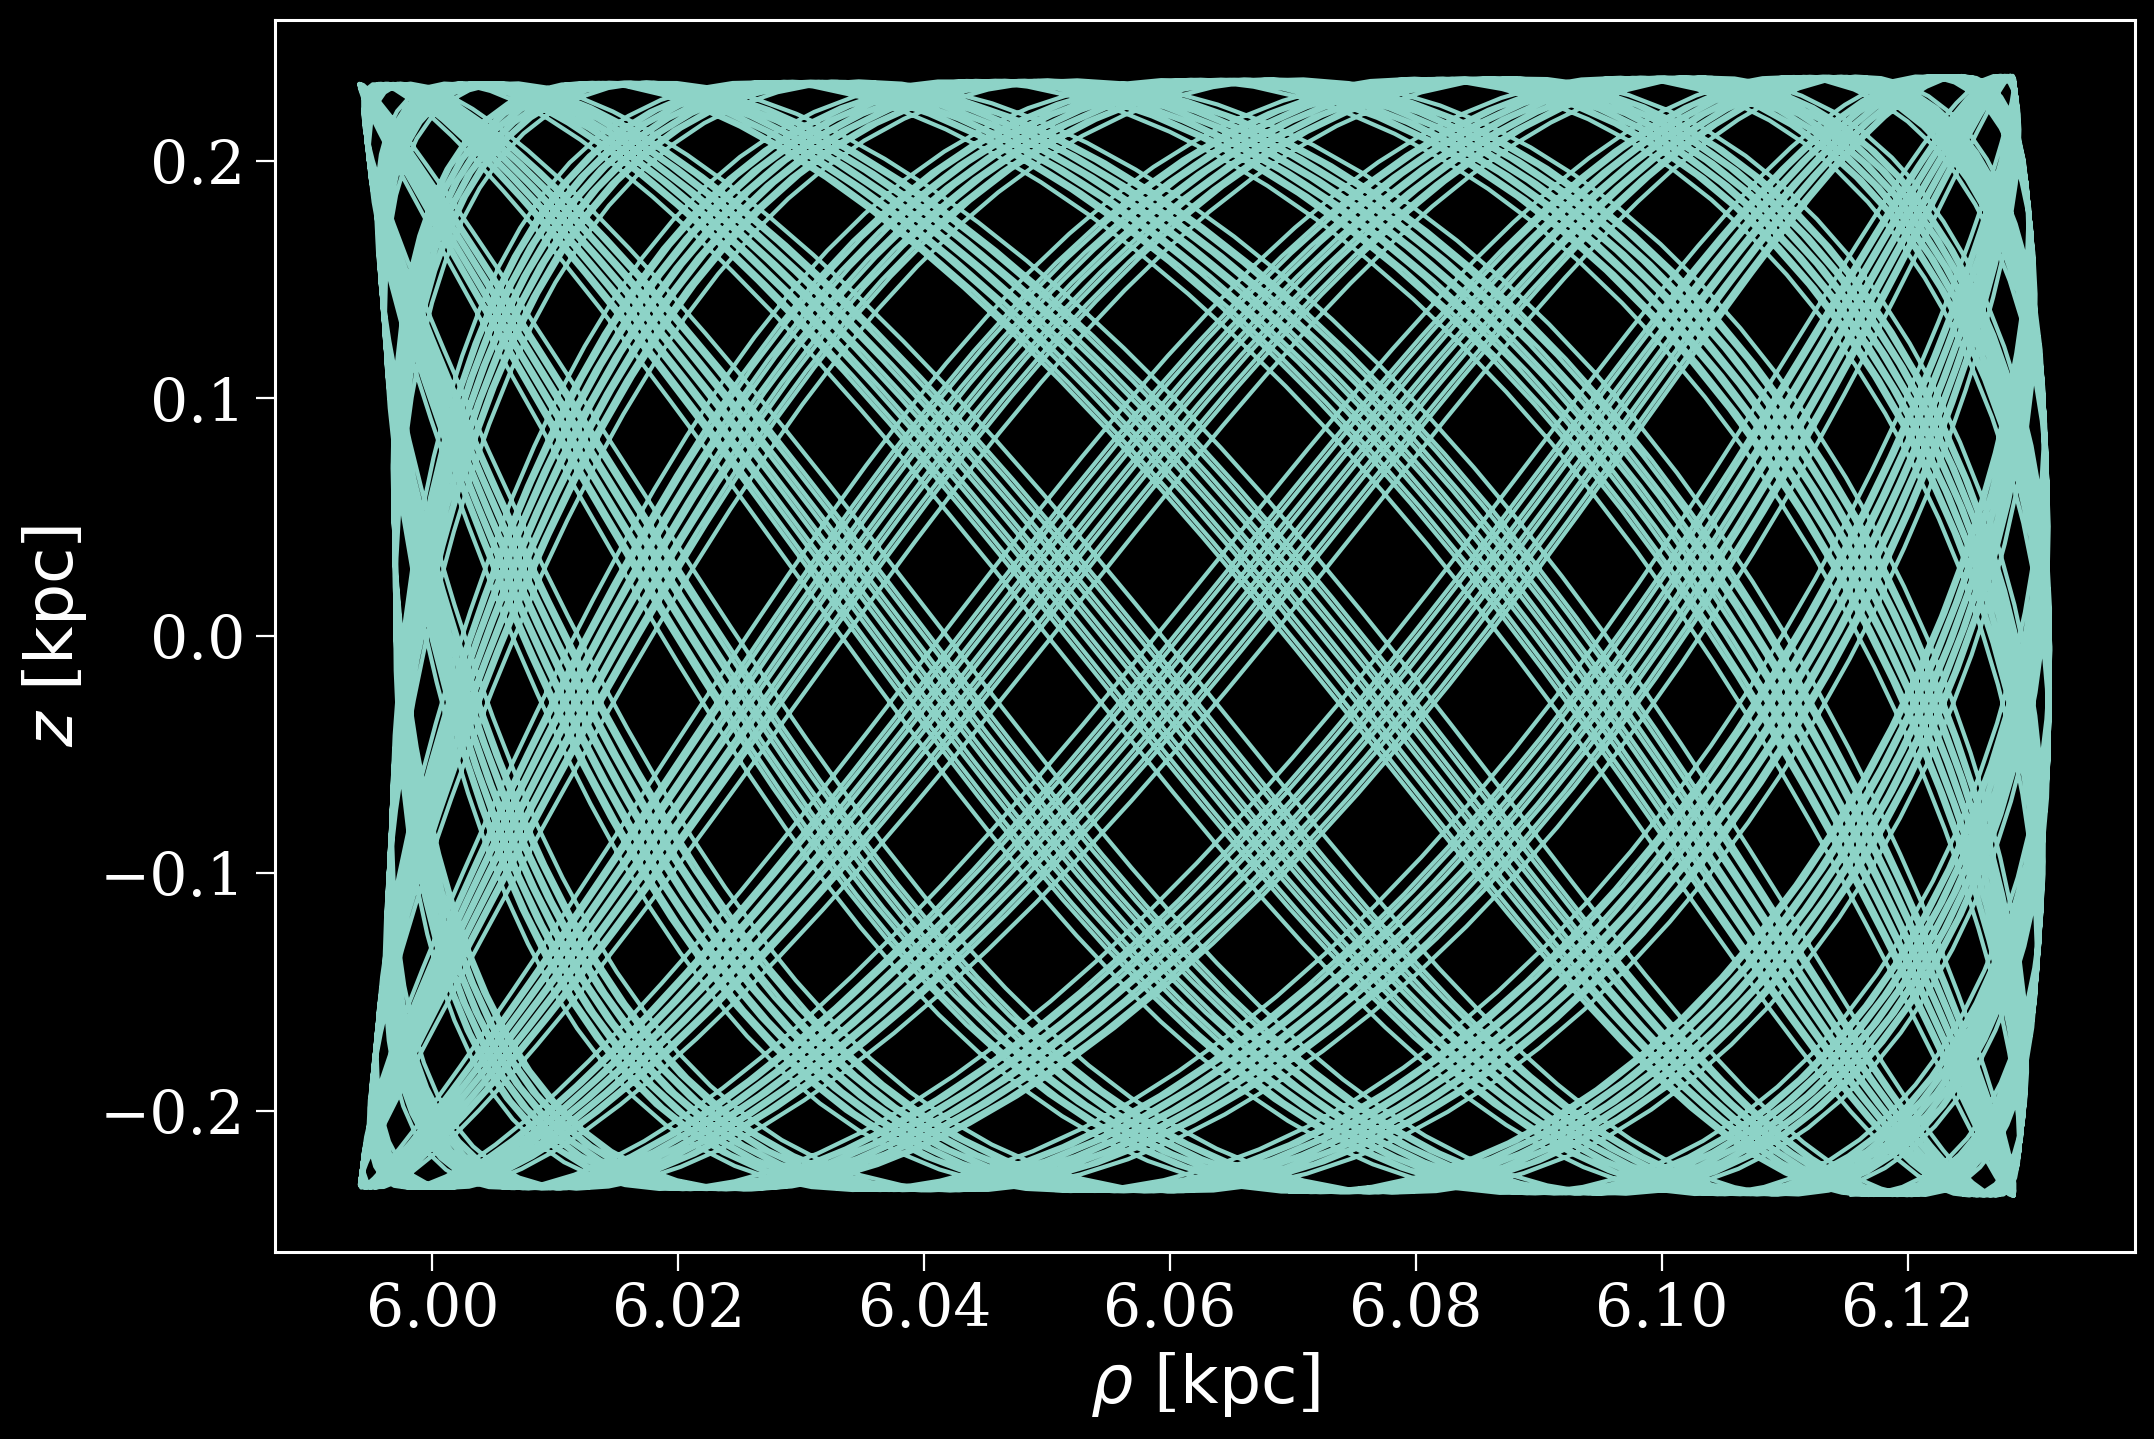

In [9]:
fig, ax = plt.subplots()
nice_orbit = p.orbits[(p.final_bpp["sep"] >= 0.0) & (p.final_coords[0].icrs.distance < 5 * u.kpc)][0]
nice_orbit.cylindrical.plot(["rho", "z"], axes=ax)
plt.show()

In [10]:
disrupted = p.final_bpp["sep"] < 0.0
p.final_bpp[disrupted]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
63,10290.580867,1.442244,12.930063,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10281.773323,10279.737983,1.000000e+10,1.000000e+10,1.442244,12.930063,0.000014,0.000055,4.199867,14.185012,2.417964e-10,1.000000e-10,6110.377564,2476.203644,0.000014,0.000055,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,6.128314e+06,2.000000e+08,1.255304e+11,0.000000e+00,0.0,0.0,0.0,0.0,8.807543,10.842884,0.0,0.0,63,0.006681
203,11254.216690,5.673646,1.277584,14.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11243.220919,11229.631911,1.000000e+10,1.000000e+10,5.673646,1.277584,0.000024,0.000014,19.678202,11.071383,1.000000e-10,1.868873e-10,3738.139911,5729.286499,0.000024,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,1.763239e+07,0.000000e+00,3.490930e+10,0.0,0.0,0.0,0.0,10.995772,24.584779,0.0,0.0,203,0.002704
376,10649.955398,1.277584,1.239892,13.0,12.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10612.549048,10584.389547,1.000000e+10,1.000000e+10,1.277584,1.239892,0.000014,0.004347,8.512169,1.239892,2.092529e-10,1.600905e-05,5893.502139,5562.616320,0.000014,0.004347,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.816277e+06,2.032682e-05,4.261848e+11,0.000000e+00,0.0,0.0,0.0,0.0,37.406350,65.565851,0.0,0.0,376,0.008764
394,6120.734216,1.867275,9.799726,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,6109.680143,6103.536115,1.000000e+10,1.000000e+10,1.867275,9.799726,0.000014,0.000042,5.339061,24.199590,8.141466e-10,1.000000e-10,8277.158138,2844.328192,0.000014,0.000042,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.023064e+06,2.000000e+08,1.598560e+12,0.000000e+00,0.0,0.0,0.0,0.0,11.054073,17.198101,0.0,0.0,394,0.002917
1118,11770.603093,1.277584,0.777523,13.0,11.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11725.697364,11054.693665,1.000000e+10,1.000000e+10,1.277584,0.777523,0.000014,0.010571,7.715302,0.777523,1.714089e-10,3.264112e-06,5606.785741,2396.869198,0.000014,0.010571,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.362863e+06,5.480259e-06,1.326546e+11,0.000000e+00,0.0,0.0,0.0,0.0,44.905728,715.909427,0.0,0.0,1118,0.001068
1193,11846.450392,1.277584,1.315443,13.0,12.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,11820.405488,11782.690009,1.000000e+10,1.000000e+10,1.277584,1.315443,0.000014,0.002907,3.426682,1.315443,1.686732e-10,5.852657e-06,5584.279064,5289.316163,0.000014,0.002907,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.872325e+07,4.284254e-05,2.667426e+10,0.000000e+00,0.0,0.0,0.0,0.0,26.044904,63.760383,0.0,0.0,1193,0.003471
1218,8973.273934,1.277584,3.921832,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,8958.769395,8954.839001,1.000000e+10,1.000000e+10,1.277584,3.921832,0.000014,0.000017,3.363738,21.832227,2.936393e-10,1.000000e-10,6414.445534,4496.164340,0.000014,0.000017,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.884994e+07,2.000000e+08,2.845532e+10,0.000000e+00,0.0,0.0,0.0,0.0,14.504538,18.434932,0.0,0.0,1218,0.013662
1258,6089.393166,1.298265,4.427143,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,6071.735300,6064.451532,1.000000e+10,1.000000e+10,1.298265,4.427143,0.000014,0.000019,3.750781,18.776266,6.461863e-10,1.000000e-10,7812.590057,4231.797554,0.000014,0.000019,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7.946754e+06,2.000000e+08,4.292998e+11,0.000000e+00,0.0,0.0,0.0,0.0,17.657866,24.941634,0.0,0.0,1258,0.003752
1525,7868.352579,13.799715,1.277584,14.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,7861.674899,7838.592951,1.000000e+10,1.000000e+10,13.799715,1.277584,0.000059,0.000014,31.058746,9.783667,1.000000e-10,3.835611e-10,2396.909411,6857.475180,0.000059,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,2.000000e+08,1.770635e+06,0.000000e+00,1.051356e+12,0

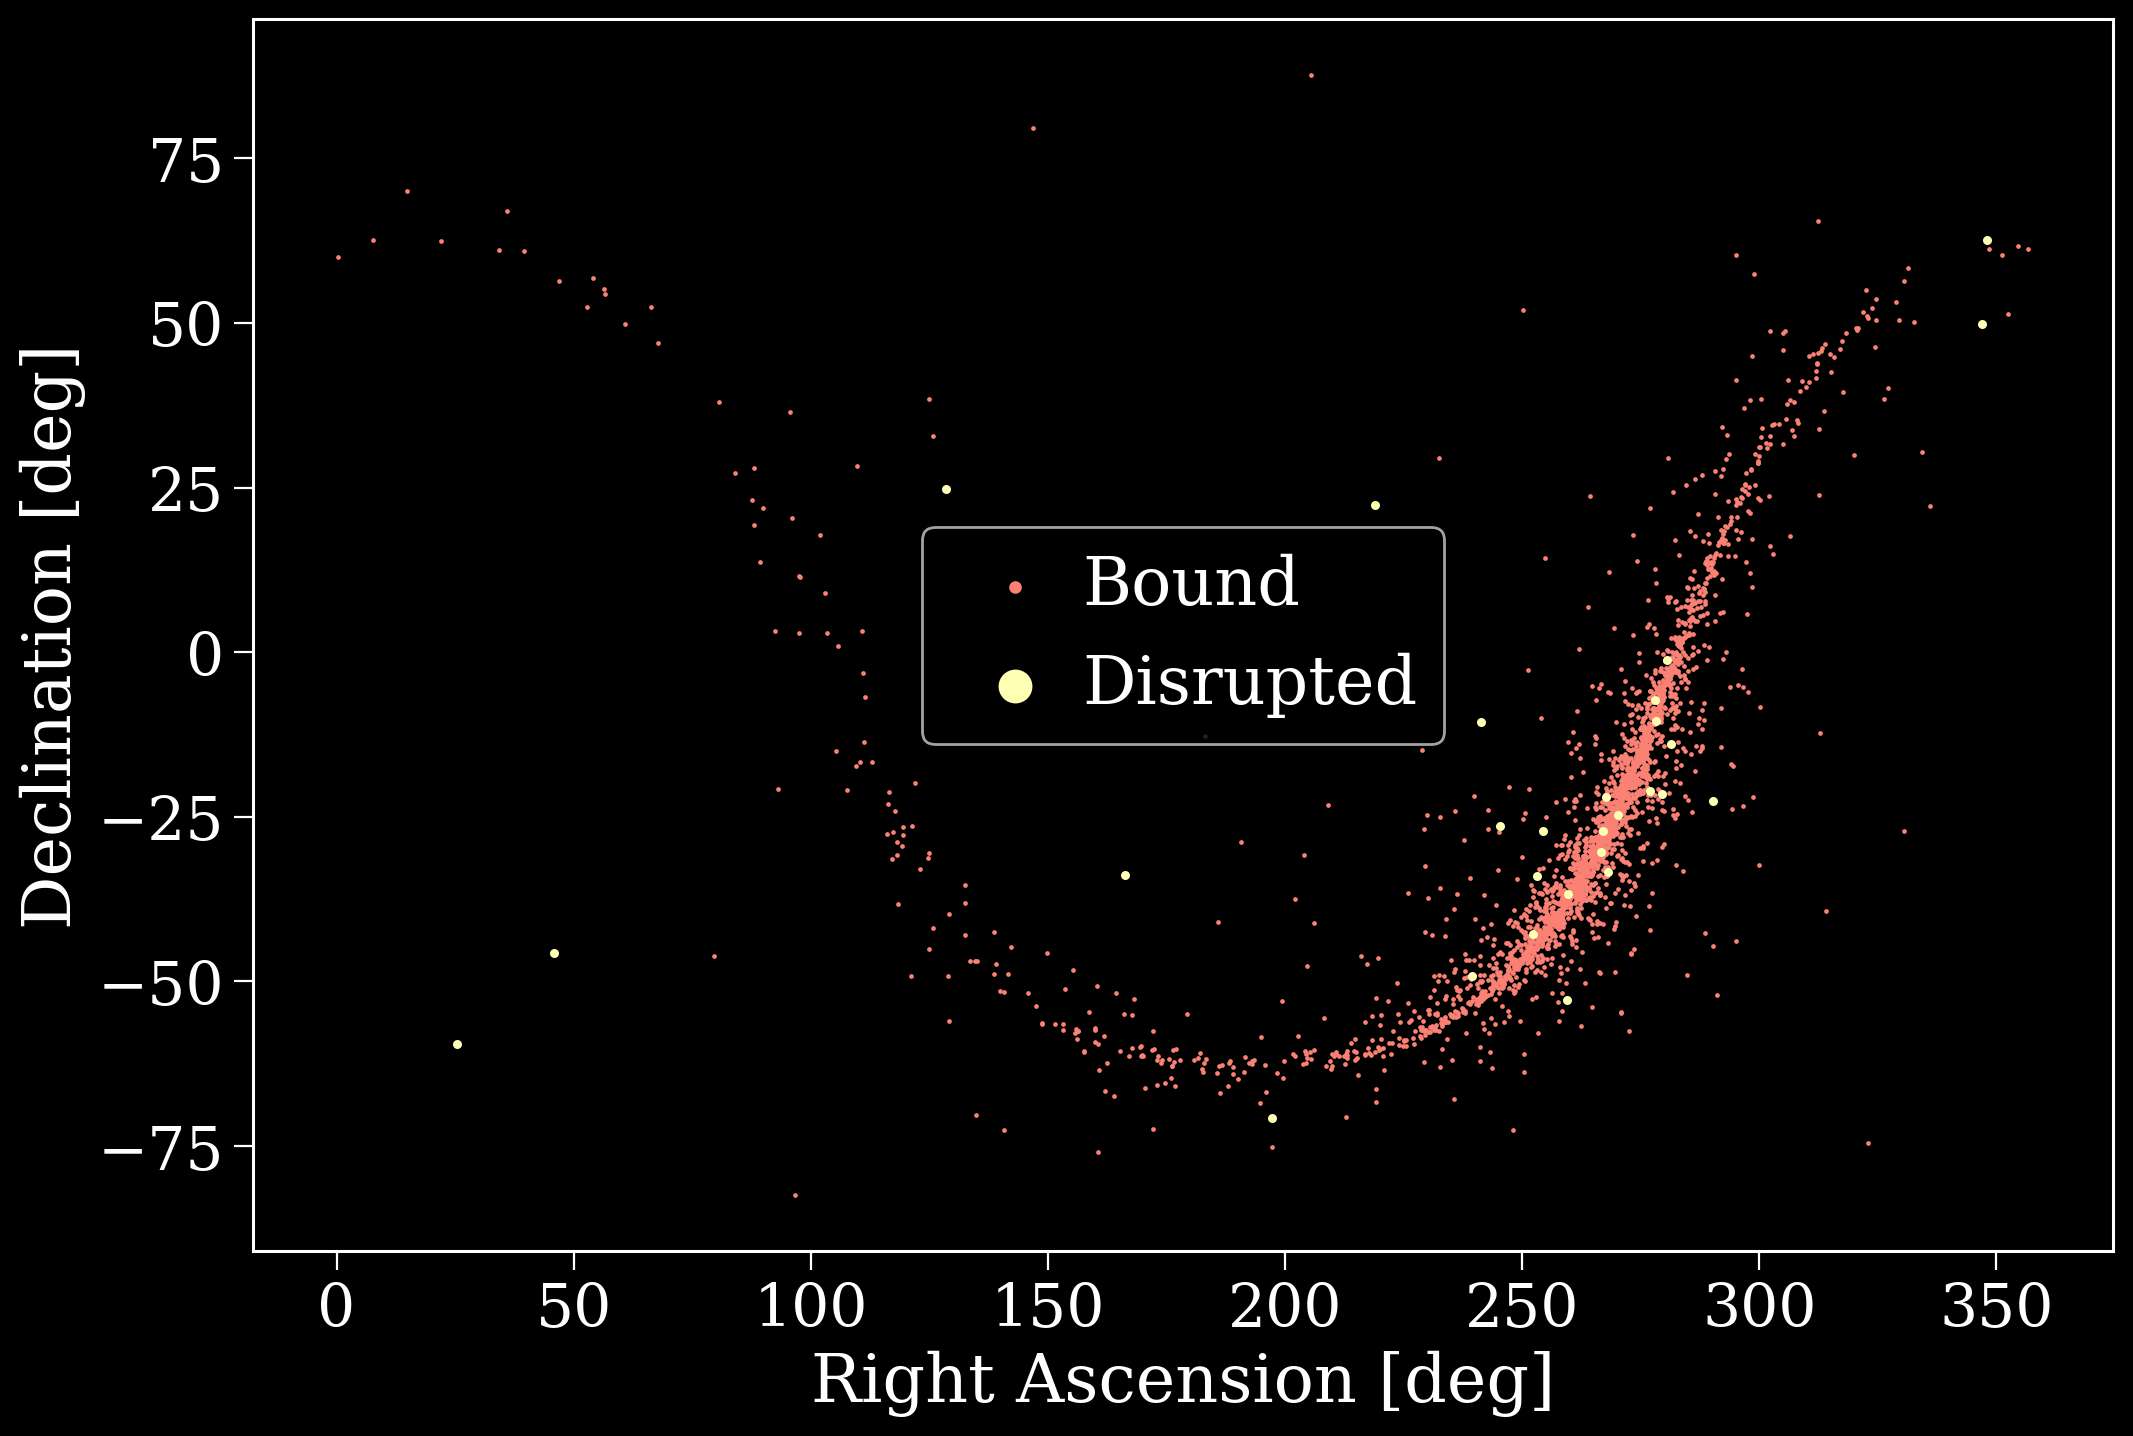

In [11]:
plt.scatter(p.final_coords[0][~disrupted].icrs.ra, p.final_coords[0][~disrupted].icrs.dec, s=0.5, c="C3", label="Bound")
plt.scatter(p.final_coords[0][disrupted].icrs.ra, p.final_coords[0][disrupted].icrs.dec, s=5, c="C1")
plt.scatter(p.final_coords[1][disrupted].icrs.ra, p.final_coords[1][disrupted].icrs.dec, s=5, c="C1", label="Disrupted")
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.legend(markerscale=5, handletextpad=.0)
plt.show()

# Classify population
The Population can also classify the present-day state of each binary. You can autogenerate these classes by accessing ``p.classes``

In [12]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2,pisn-1,pisn-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2646,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This table has a flag for each class and for each binary. We can do some pandas DataFrame manipulation to get some statistics for the different classes

In [13]:
p.classes.astype(int).sum()

dco                     0
co-1                   14
co-2                   11
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             1
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             1
widow-1                 0
widow-2                 1
stellar-merger-co-1     8
stellar-merger-co-2    15
pisn-1                  0
pisn-2                  0
dtype: int64

# Predict observables
You can also use the Population class to predict what we might actually observe for this population in different filters. This uses dust maps to correct for extinction, applies bolometric corrections and blends the stars if necessary.

In [16]:
p.observables

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 23.829 s
  pix_info:   0.514 s
   samples:   9.196 s
      best:   4.357 s
       nan:   0.024 s
      sort:   9.659 s
       idx:   0.079 s
Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 23.998 s
  pix_info:   0.513 s
   samples:   9.215 s
      best:   4.420 s
       nan:   0.019 s
      sort:   9.756 s
       idx:   0.074 s


,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,J_app_1,J_app_2,J_abs_1,J_abs_2,H_app_1,H_app_2,H_abs_1,H_abs_2,K_app_1,K_app_2,K_abs_1,K_abs_2,G_app_1,G_app_2,teff_obs,log_g_obs,secondary_brighter,G_abs_1,G_abs_2,BP_app_1,BP_app_2,BP_abs_1,BP_abs_2,RP_app_1,RP_app_2,RP_abs_1,RP_abs_2
0,5.082000,6.0,9.139888,23.276027,11.903532,26.039672,22.891351,inf,7.274492,inf,21.683097,inf,6.609281,inf,21.150739,inf,6.408851,inf,27.178094,inf,3576.216161,4.910592,False,9.847101,inf,29.987032,inf,11.026434,inf,25.836935,inf,8.806886,inf
1,2.772000,6.0,9.450010,23.900631,12.272300,26.722921,23.009704,inf,7.691814,inf,22.025773,inf,7.008619,inf,21.617684,inf,6.796485,inf,26.274349,inf,3740.890312,4.987877,False,9.879615,inf,27.924847,inf,10.800813,inf,25.110572,inf,8.957185,inf
2,2.112000,6.0,8.817249,23.018907,10.264359,24.466017,21.885554,inf,6.908453,inf,20.959933,inf,6.249599,inf,20.587209,inf,6.048634,inf,24.944387,inf,3777.004039,4.906367,False,9.058321,inf,26.410617,inf,9.973886,inf,23.819768,inf,8.137544,inf
3,6.000000,6.0,15.455306,30.821120,inf,inf,31.142944,inf,14.052745,inf,29.930920,inf,13.472231,inf,29.466217,inf,13.393542,inf,35.110442,inf,4714.113646,8.240418,False,15.550429,inf,37.272823,inf,16.072120,inf,33.839068,inf,14.882365,inf
4,6.000000,6.0,8.643141,23.662135,9.143262,24.162256,23.153055,inf,6.411721,inf,21.852730,inf,5.743214,inf,21.271821,inf,5.547928,inf,27.544792,inf,3710.156797,4.861763,False,8.712632,inf,30.392965,inf,9.717949,inf,26.196113,inf,7.745744,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,6.000000,6.0,8.380443,23.501894,9.197612,24.319063,23.079146,inf,6.235647,inf,21.764677,inf,5.552873,inf,21.189748,inf,5.363346,inf,27.523513,inf,3717.845731,4.814005,False,8.632255,inf,30.481540,inf,9.696745,inf,26.165725,inf,7.637932,inf
2645,1.650000,6.0,10.257186,25.143944,12.923723,27.810481,23.943197,inf,8.580886,inf,23.086082,inf,7.898781,inf,22.766728,inf,7.686009,inf,26.856803,inf,3607.335934,5.076749,False,10.813783,inf,28.287799,inf,11.805663,inf,25.748033,inf,9.863481,inf
2646,5.337417,6.0,10.460269,25.677757,13.059194,28.276682,25.385870,inf,8.636382,inf,24.164708,inf,7.977070,inf,23.603243,inf,7.760734,inf,29.830137,inf,3314.027521,5.029302,False,11.360292,inf,32.934007,inf,12.707932,inf,28.465536,inf,10.266635,inf
2647,3.531000,6.0,8.508588,22.825905,8.861261,23.178577,21.852896,inf,6.273073,inf,20.738454,inf,5.610909,inf,20.265221,inf,5.418608,inf,25.521073,inf,3812.573473,4.865676,False,8.399512,inf,27.478327,inf,9.298721,inf,24.288977,inf,7.486414,inf


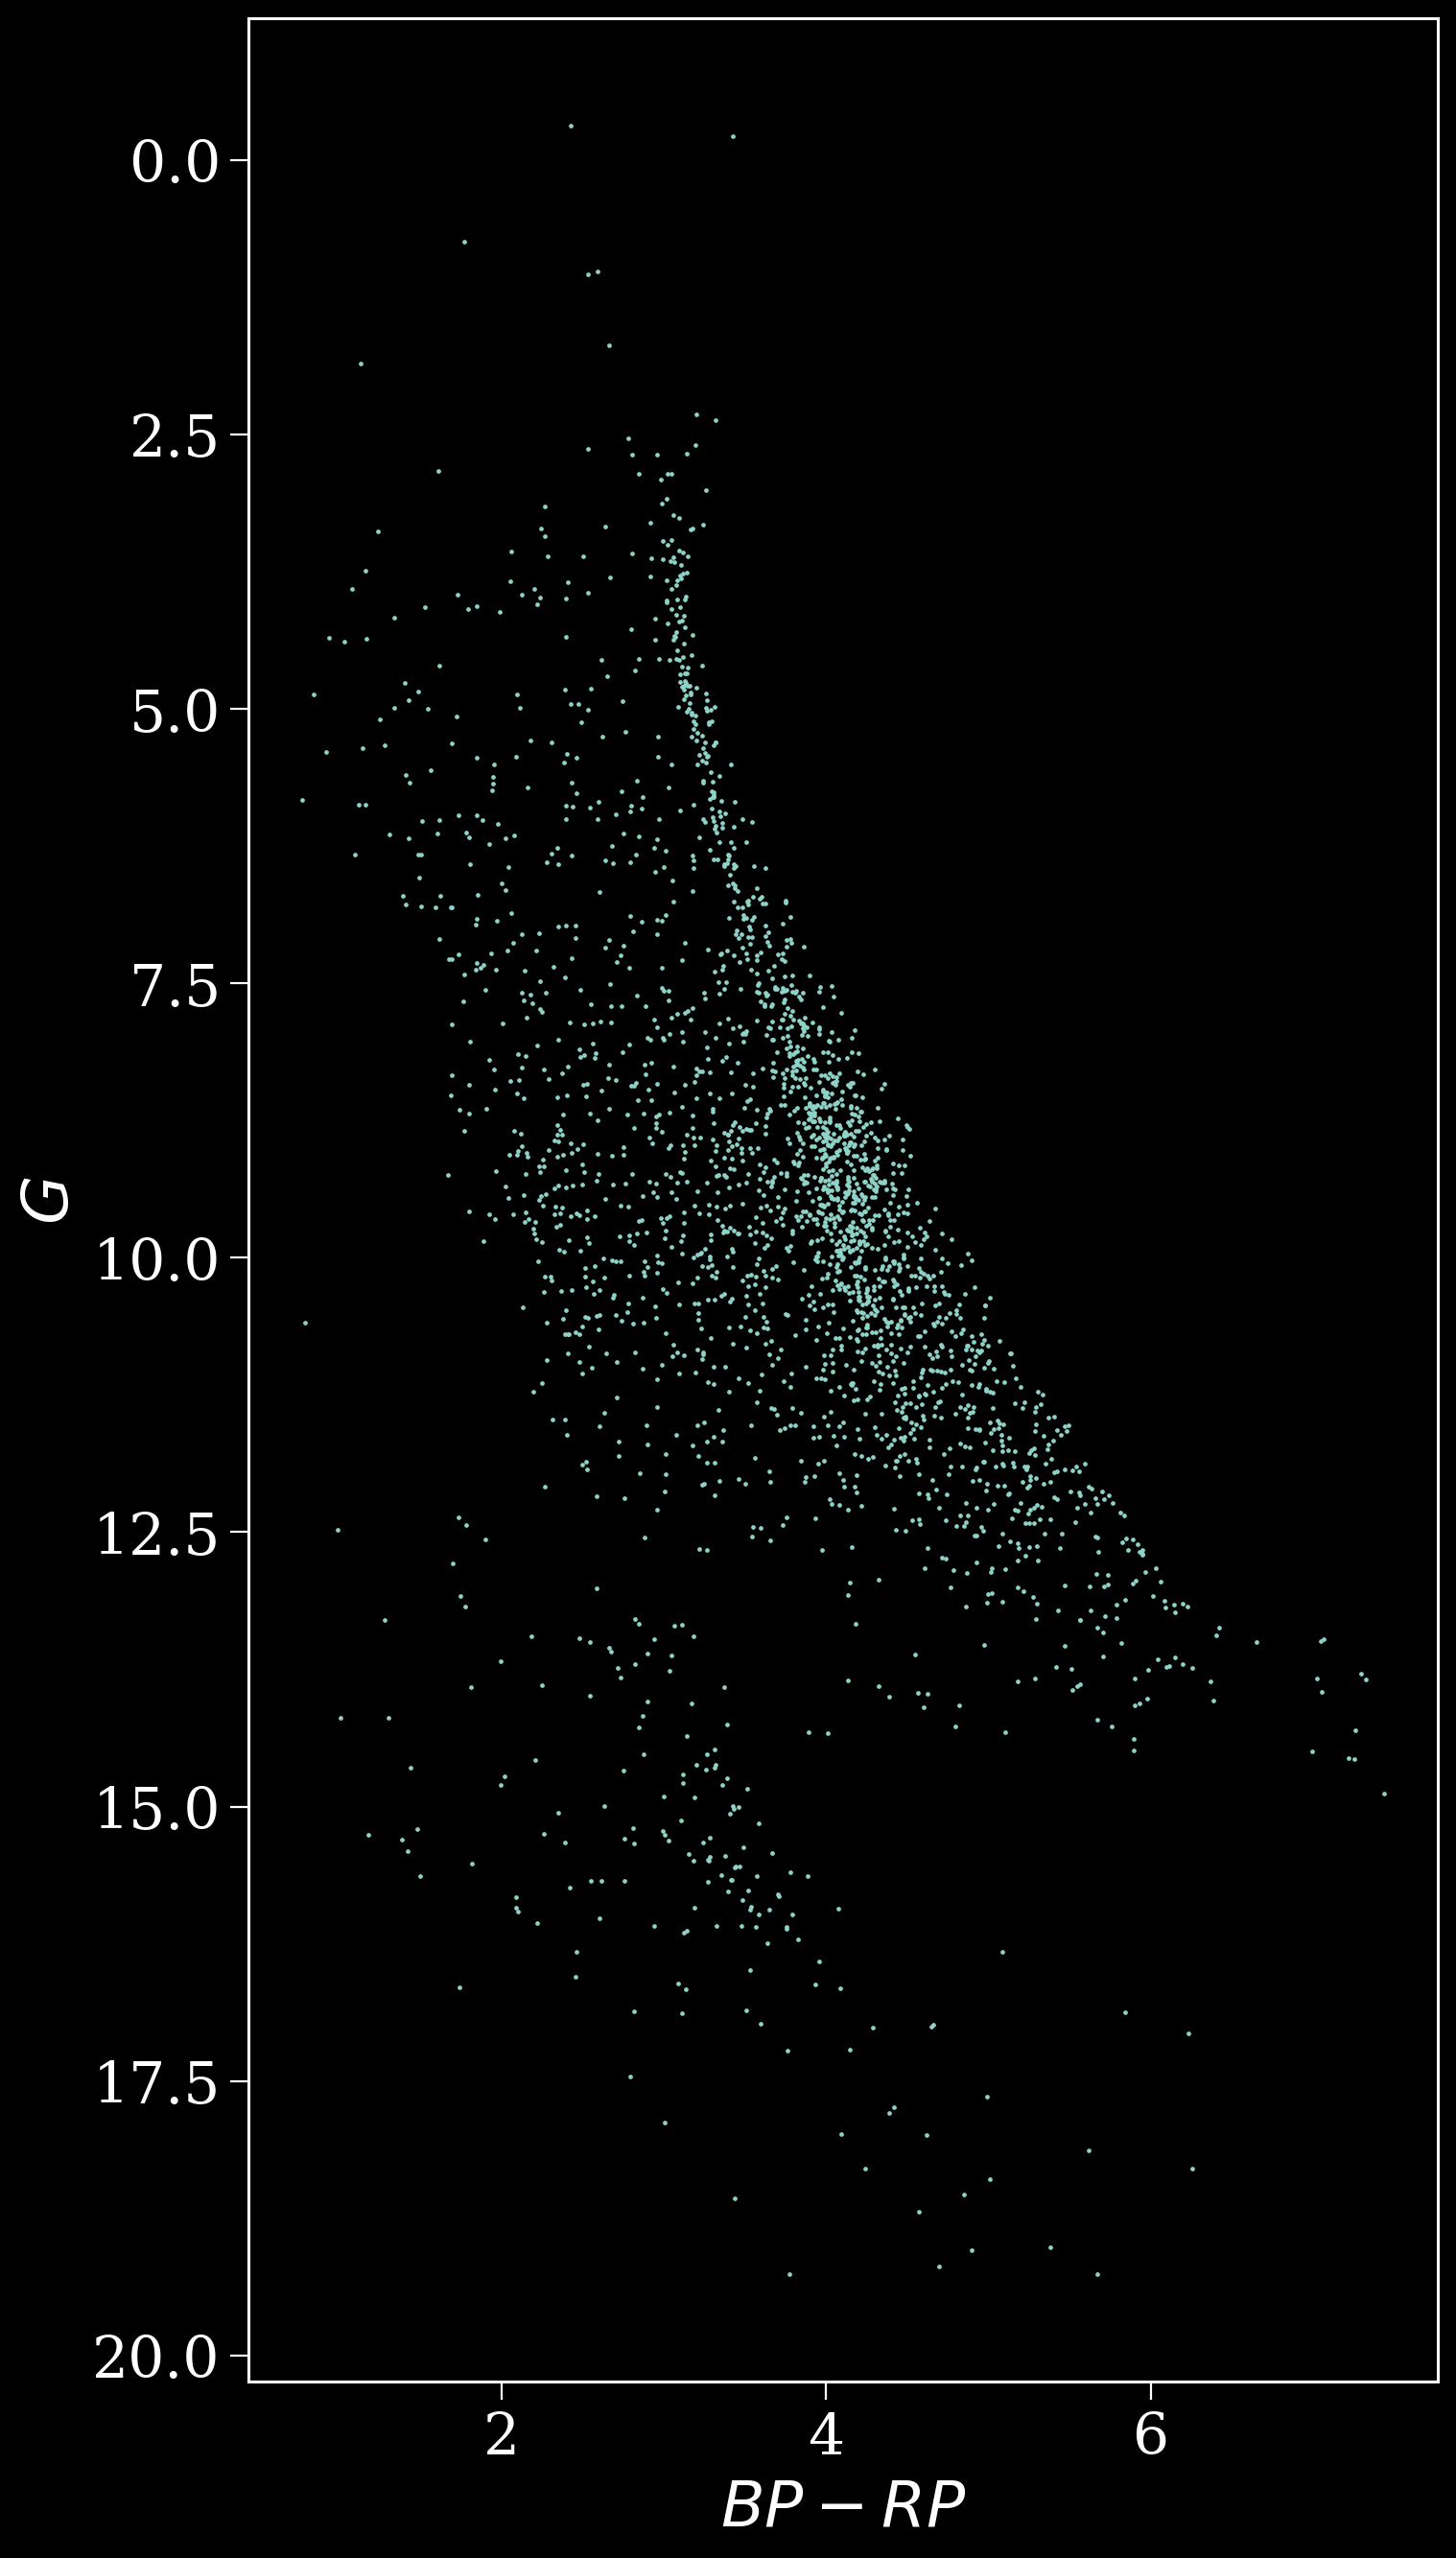

In [17]:
plt.figure(figsize=(8, 16))
plt.scatter(p.observables["BP_app_1"] - p.observables["RP_app_1"],
            p.observables["G_abs_1"], s=0.5)
plt.ylim(reversed(plt.ylim()))
plt.xlabel(r"$BP-RP$")
plt.ylabel(r"$G$")
plt.show()